# Data Question & Collection
1. Compare California and Texas income and education level percentages of 25 year olds or older over the last 5 years.
2. US census data was collected from https://data.census.gov by searching S1501 for education levels and DP03 for population data.
3. Multiple tables then uploaded to SQL Server with the import wizard.
4. Look at meta data to get names for column codes

# Get from SQL Server

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc 

In [2]:
sns.set_style('darkgrid')
sns.set_palette('winter')
sns.set(rc = {'figure.figsize':(15,8)})


conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=PortfolioProjects;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()

In [3]:
df = pd.read_sql_query('''

WITH CTE
(NAME ,DP03_0055PE, DP03_0056PM, DP03_0057PE ,DP03_0058PE, DP03_0059PE)
AS
(
SELECT NAME ,DP03_0055PE, DP03_0056PM, DP03_0057PE ,DP03_0058PE, DP03_0059PE
FROM PortfolioProjects.dbo.US_census_california_counties_csv
UNION 
SELECT NAME ,DP03_0055PE, DP03_0056PM, DP03_0057PE ,DP03_0058PE, DP03_0059PE
FROM PortfolioProjects.dbo.US_census_texas_counties_csv
),
CTE2
(NAME, S1501_C02_009E, S1501_C02_011E, S1501_C02_012E, S1501_C02_014E, S1501_C02_015E) 
AS 
(
SELECT NAME, S1501_C02_009E, S1501_C02_011E, S1501_C02_012E, S1501_C02_014E, S1501_C02_015E
FROM PortfolioProjects.dbo.US_census_education_csv
)
SELECT 
CTE.NAME, S1501_C02_009E, S1501_C02_011E, S1501_C02_012E, S1501_C02_014E, 
S1501_C02_015E,DP03_0055PE, DP03_0056PM, DP03_0057PE ,DP03_0058PE, DP03_0059PE
FROM CTE
JOIN CTE2
ON CTE.NAME = CTE2.NAME

''', conn)
df

C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,NAME,S1501_C02_009E,S1501_C02_011E,S1501_C02_012E,S1501_C02_014E,S1501_C02_015E,DP03_0055PE,DP03_0056PM,DP03_0057PE,DP03_0058PE,DP03_0059PE
0,"Alameda County, California",17,6.4,28.1,88.8,48.7,5.2,0.3,12,11.2,17.9
1,"Alpine County, California",28.7,5.6,19.8,95.3,38.4,12.1,3.4,18.6,10.3,28.5
2,"Modoc County, California",31.8,9.2,12.2,84.7,18.2,17.3,2.5,23.6,13.5,10.4
3,"Amador County, California",30,13.4,12.3,91.2,18.1,9.9,2.1,19.3,13.8,16.2
4,"Butte County, California",22.6,10.5,18.4,89.7,28.3,10.3,0.8,16.1,11.7,13.5
...,...,...,...,...,...,...,...,...,...,...,...
308,"Wood County, Texas",33.1,7.2,12.2,85.6,19.2,12.0,1.6,17.5,12.4,12.1
309,"Young County, Texas",30.4,4.8,16.5,84.8,23.6,12.3,2.9,17.9,10.8,15.0
310,"Zapata County, Texas",30.6,5.1,11.1,64.7,12.2,16.3,4.2,11.4,9.7,4.9
311,"Zavala County, Texas",35,6.5,7,75.7,12.4,12.4,5.7,14.2,8.9,3.7


# Data Cleaning

In [4]:
# Split state and county into two columns
df[['COUNTY','STATE']] = df['NAME'].str.split(',', expand=True)

In [5]:
# Drop the old name column
df.drop('NAME',axis=1,inplace=True)

In [6]:
# Rename all columns
df.columns = ['High school graduate',
            'Associates degree',
            'Bachelors degree',
            'High school graduate or higher',
            'Bachelors degree or higher',
            '25,000-34,999',
            '35,000-49,999',
            '50,000-74,999',
            '75,000-99,999',
            '100,000-149,999',
            'COUNTY','STATE']

In [7]:
df

,High school graduate,Associates degree,Bachelors degree,High school graduate or higher,Bachelors degree or higher,"25,000-34,999","35,000-49,999","50,000-74,999","75,000-99,999","100,000-149,999",COUNTY,STATE
0,17,6.4,28.1,88.8,48.7,5.2,0.3,12,11.2,17.9,Alameda County,California
1,28.7,5.6,19.8,95.3,38.4,12.1,3.4,18.6,10.3,28.5,Alpine County,California
2,31.8,9.2,12.2,84.7,18.2,17.3,2.5,23.6,13.5,10.4,Modoc County,California
3,30,13.4,12.3,91.2,18.1,9.9,2.1,19.3,13.8,16.2,Amador County,California
4,22.6,10.5,18.4,89.7,28.3,10.3,0.8,16.1,11.7,13.5,Butte County,California
...,...,...,...,...,...,...,...,...,...,...,...,...
308,33.1,7.2,12.2,85.6,19.2,12.0,1.6,17.5,12.4,12.1,Wood County,Texas
309,30.4,4.8,16.5,84.8,23.6,12.3,2.9,17.9,10.8,15.0,Young County,Texas
310,30.6,5.1,11.1,64.7,12.2,16.3,4.2,11.4,9.7,4.9,Zapata County,Texas
311,35,6.5,7,75.7,12.4,12.4,5.7,14.2,8.9,3.7,Zavala County,Texas


In [8]:
# Check out data types and nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   High school graduate            313 non-null    object
 1   Associates degree               313 non-null    object
 2   Bachelors degree                313 non-null    object
 3   High school graduate or higher  313 non-null    object
 4   Bachelors degree or higher      313 non-null    object
 5   25,000-34,999                   313 non-null    object
 6   35,000-49,999                   313 non-null    object
 7   50,000-74,999                   313 non-null    object
 8   75,000-99,999                   313 non-null    object
 9   100,000-149,999                 313 non-null    object
 10  COUNTY                          313 non-null    object
 11  STATE                           312 non-null    object
dtypes: object(12)
memory usage: 29.5+ KB


In [9]:
# Create new table with just numbers and change data type to float
df2 = df.drop(['COUNTY','STATE'],axis=1)         
df2 = df2.astype(float)    
df2.info()     

In [11]:
# Create new table with just objects data type and merge with float colmuns
df1 = df[['COUNTY','STATE']]
df = df1.merge(df2,left_index=True,right_index=True)
df.info()
df.to_csv('states.csv',index=False) # use for tableau, feature engineering and machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COUNTY                          313 non-null    object 
 1   STATE                           312 non-null    object 
 2   High school graduate            313 non-null    float64
 3   Associates degree               313 non-null    float64
 4   Bachelors degree                313 non-null    float64
 5   High school graduate or higher  313 non-null    float64
 6   Bachelors degree or higher      313 non-null    float64
 7   25,000-34,999                   313 non-null    float64
 8   35,000-49,999                   313 non-null    float64
 9   50,000-74,999                   313 non-null    float64
 10  75,000-99,999                   313 non-null    float64
 11  100,000-149,999                 313 non-null    float64
dtypes: float64(10), object(2)
memory usa

,COUNTY,STATE,High school graduate,Associates degree,Bachelors degree,High school graduate or higher,Bachelors degree or higher,"25,000-34,999","35,000-49,999","50,000-74,999","75,000-99,999","100,000-149,999"
0,Alameda County,California,17.0,6.4,28.1,88.8,48.7,5.2,0.3,12.0,11.2,17.9
1,Alpine County,California,28.7,5.6,19.8,95.3,38.4,12.1,3.4,18.6,10.3,28.5
2,Modoc County,California,31.8,9.2,12.2,84.7,18.2,17.3,2.5,23.6,13.5,10.4
3,Amador County,California,30.0,13.4,12.3,91.2,18.1,9.9,2.1,19.3,13.8,16.2
4,Butte County,California,22.6,10.5,18.4,89.7,28.3,10.3,0.8,16.1,11.7,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...
308,Wood County,Texas,33.1,7.2,12.2,85.6,19.2,12.0,1.6,17.5,12.4,12.1
309,Young County,Texas,30.4,4.8,16.5,84.8,23.6,12.3,2.9,17.9,10.8,15.0
310,Zapata County,Texas,30.6,5.1,11.1,64.7,12.2,16.3,4.2,11.4,9.7,4.9
311,Zavala County,Texas,35.0,6.5,7.0,75.7,12.4,12.4,5.7,14.2,8.9,3.7


# Basic EDA

Missing values 
COUNTY                            0
STATE                             1
High_school_graduate              0
Associates_degree                 0
Bachelors_degree                  0
High_school_graduate_or_higher    0
Bachelors_degree_or_higher        0
25,000-34,999                     0
35,000-49,999                     0
50,000-74,999                     0
75,000-99,999                     0
100,000-149,999                   0
dtype: int64
Total missing values  1

Data index RangeIndex(start=0, stop=313, step=1)

Data types 
COUNTY                             object
STATE                              object
High_school_graduate              float64
Associates_degree                 float64
Bachelors_degree                  float64
High_school_graduate_or_higher    float64
Bachelors_degree_or_higher        float64
25,000-34,999                     float64
35,000-49,999                     float64
50,000-74,999                     float64
75,000-99,999                   

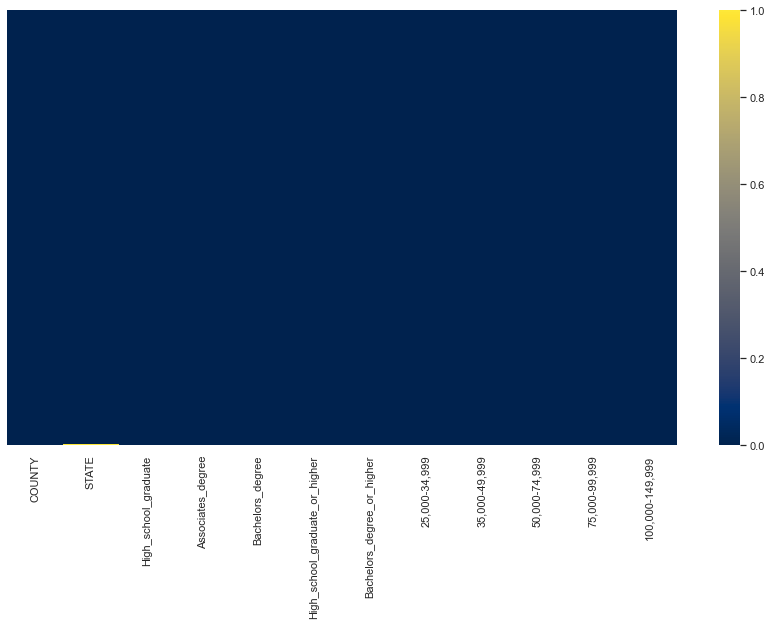

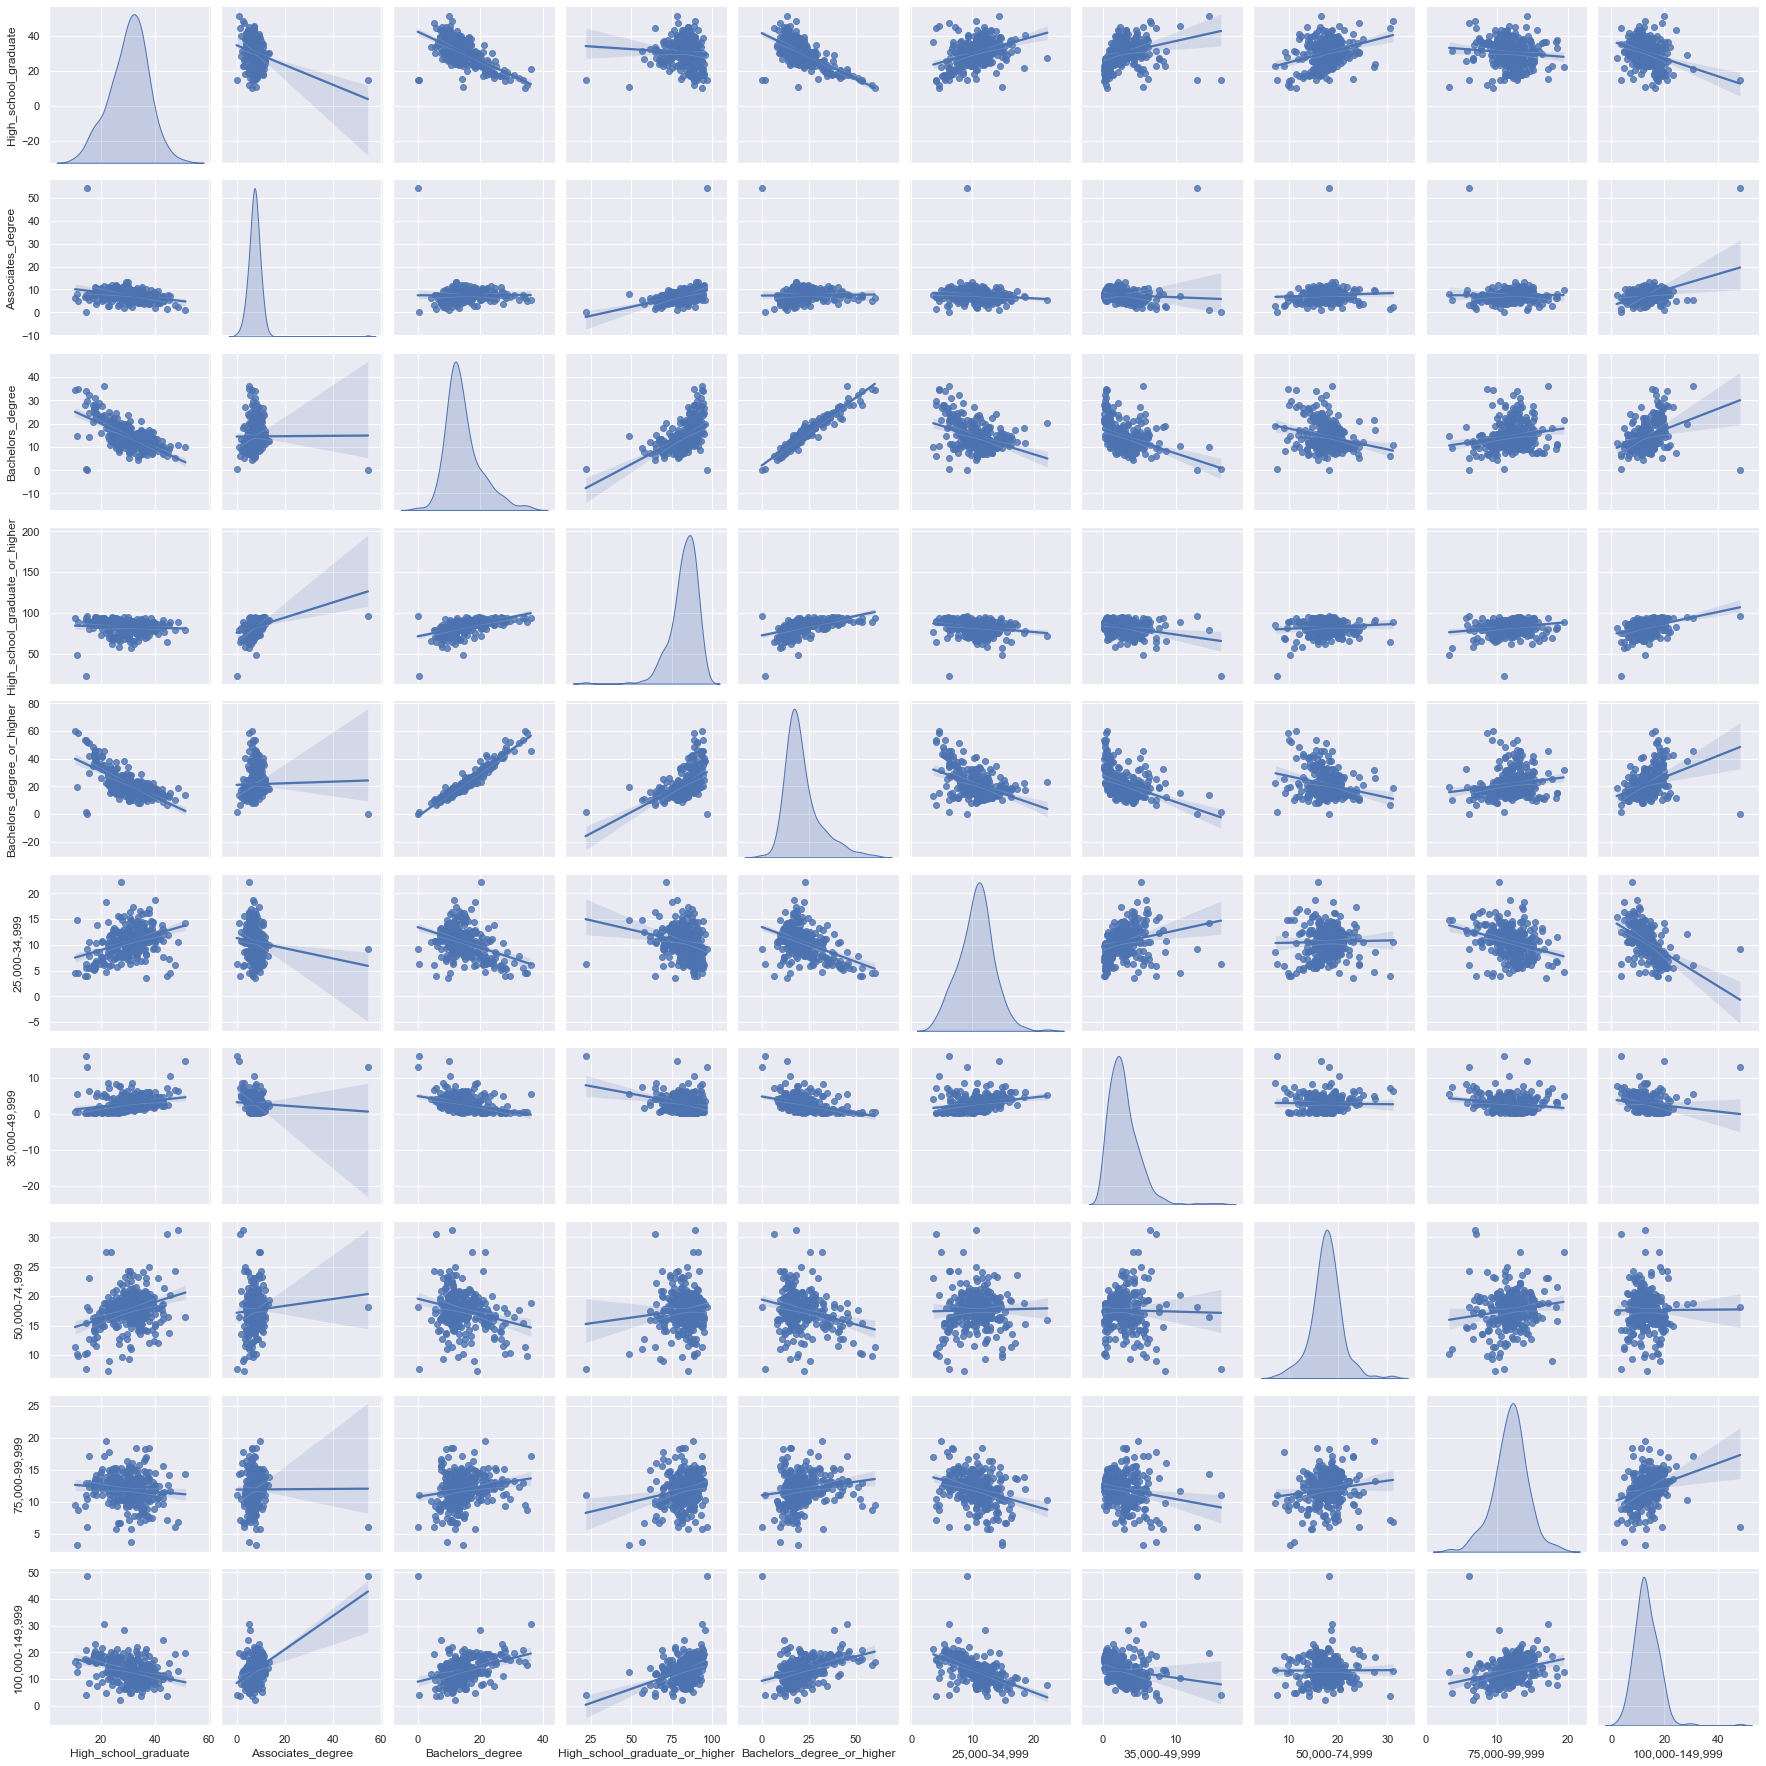

In [12]:
def eda(dataframe):
    # Replace any blank spaces w/ a underscore.
    dataframe.columns = dataframe.columns.str.replace(" ", "_")
    # Checks for the null values.
    print("Missing values \n{}".format(dataframe.isnull().sum()))
    print("Total missing values  {}".format(dataframe.isnull().sum().sum())) 
    # Checks the data frame range size.
    print("\nData index {}".format(dataframe.index))
    # Checks for data types of the columns within the data frame.
    print("\nData types \n{}".format(dataframe.dtypes))
    # Checks the shape of the data frame.
    print("\nShape {}".format(dataframe.shape))
    # Gives us any statistical information of the data frame.
    print("\nDescribe \n{}".format(dataframe.describe()))
    # Gives us the duplicated data of the data frame. 
    print("\nDuplicates \n{}".format(dataframe[dataframe.duplicated()].sum()))
    # A for loop that does this for every single column & their 
    # values within our data frame giving us all unique values.
    print('\nUnique Values Count')
    for item in dataframe:
        print(item, dataframe[item].nunique())
    print('\nUnique Values')   
    for item in dataframe:
        print(item,'\n',dataframe[item].unique())
       
# Let's apply this function to our entire data frame.
eda(df)
sns.heatmap(df.isnull(),yticklabels=False,cmap='cividis')
sns.pairplot(df, kind='reg',diag_kind='kde')

<AxesSubplot:>

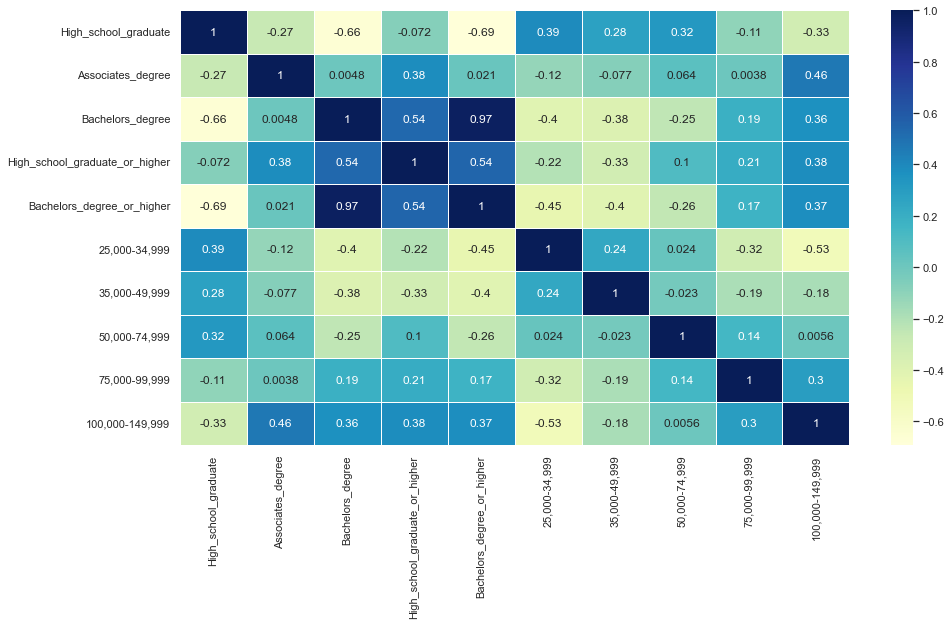

In [13]:
# Pearson Correlation Heatmap
sns.heatmap(df.corr(method='pearson'),
            linewidths=.5,
            cmap="YlGnBu",
            annot=True)

<AxesSubplot:>

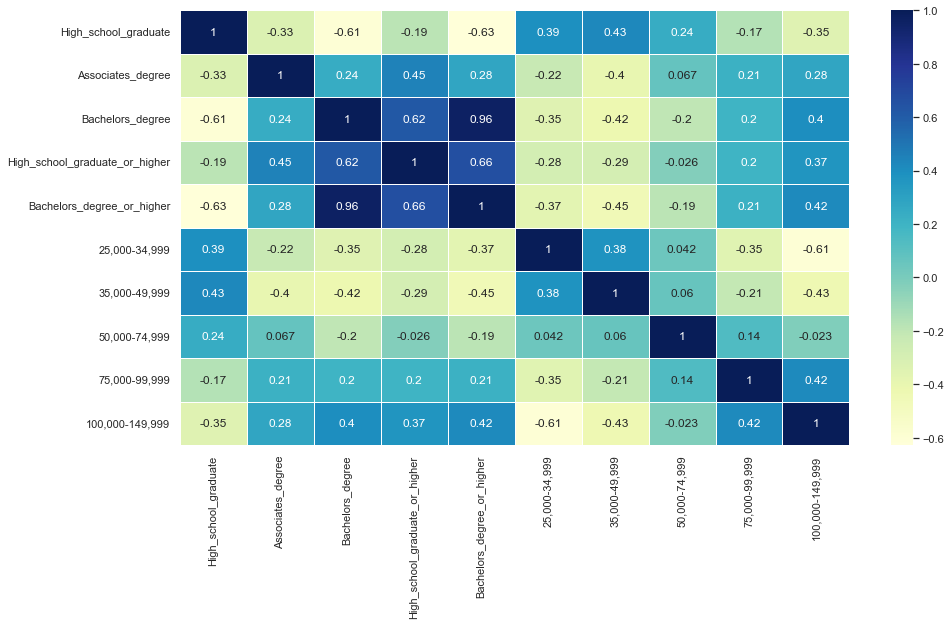

In [14]:
# Spearman Correlation Heatmap
sns.heatmap(df.corr(method='spearman'),
            linewidths=.5,
            cmap="YlGnBu",
            annot=True)

In [41]:
# largest positive correlated columns to our tartget or y column.
largest_pos_corr_list = df.corr()[
    ['25,000-34,999','35,000-49,999','50,000-74,999']].sort_values(
        ['25,000-34,999','35,000-49,999','50,000-74,999']).tail(5).T.columns.drop(
            ['25,000-34,999','35,000-49,999','50,000-74,999']).tolist()
print('pos_corr_with_incomes_under_75k\n',largest_pos_corr_list)

largest_neg_corr_list = df.corr()[
    ['25,000-34,999','35,000-49,999','50,000-74,999']].sort_values(
        ['25,000-34,999','35,000-49,999','50,000-74,999']).head(5).T.columns.tolist()
print('neg_corr_with_incomes_under_75k\n',largest_neg_corr_list)


pos_corr_with_incomes_under_75k
 ['Associates_degree', 'High_school_graduate']
neg_corr_with_incomes_under_75k
 ['100,000-149,999', 'Bachelors_degree_or_higher', 'Bachelors_degree', '75,000-99,999', 'High_school_graduate_or_higher']


# Advanced EDA 

<AxesSubplot:xlabel='STATE', ylabel='count'>

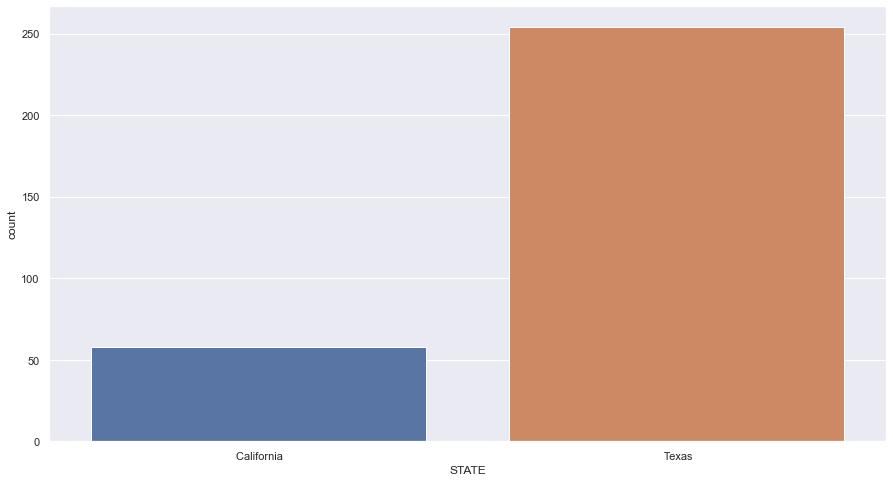

In [15]:
# How many counties in each state
sns.countplot(x='STATE',data=df)

<AxesSubplot:xlabel='Bachelors_degree_or_higher', ylabel='100,000-149,999'>

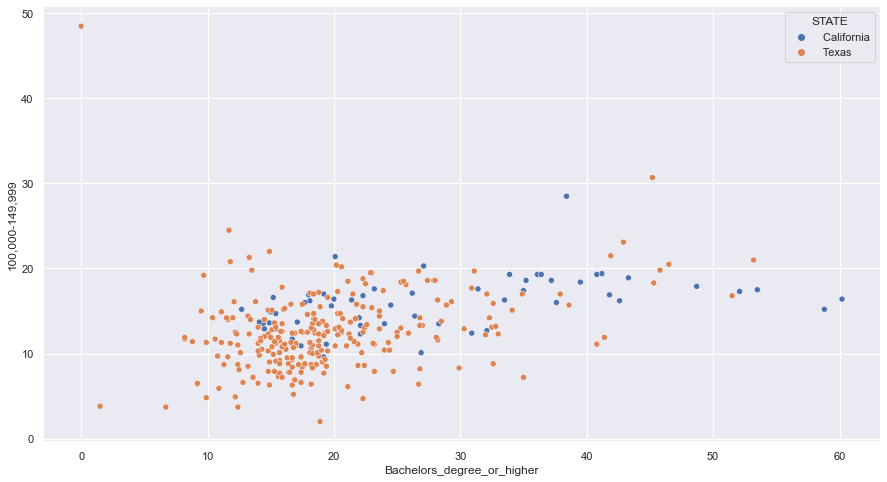

In [16]:
sns.scatterplot(x='Bachelors_degree_or_higher',
                y='100,000-149,999',
                data=df ,
                hue='STATE')

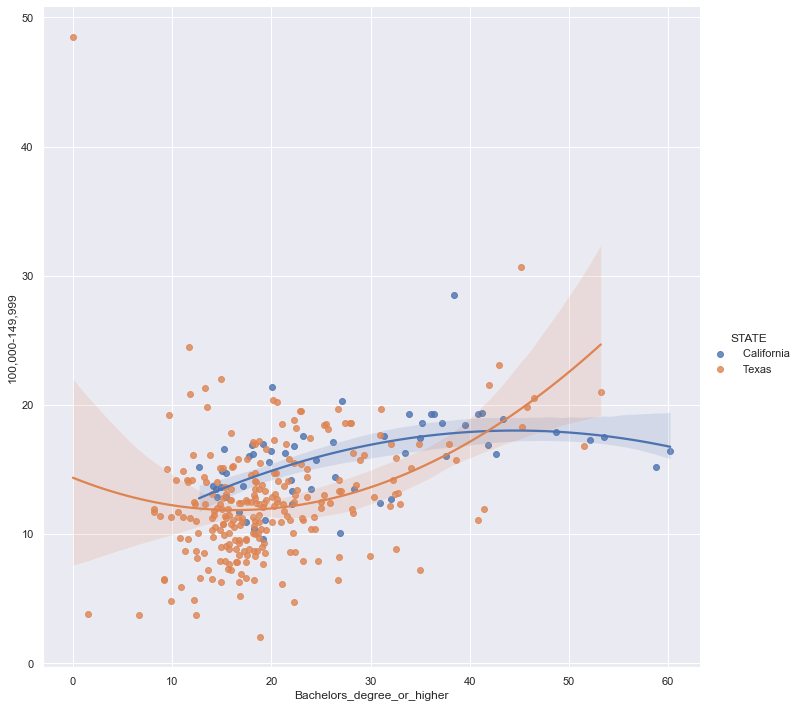

In [17]:
# add regression line per group 
sns.lmplot(x="Bachelors_degree_or_higher", 
           y="100,000-149,999", 
           hue="STATE",
           data=df,
           height=10,
           order=2, 
           ci=90) #x_ci for discrete values and ci for continuious

#plt.savefig("How_To_Add_Regression_Line_per_group_Seaborn.png",format='png',dpi=150)

<AxesSubplot:xlabel='Bachelors_degree_or_higher', ylabel='100,000-149,999'>

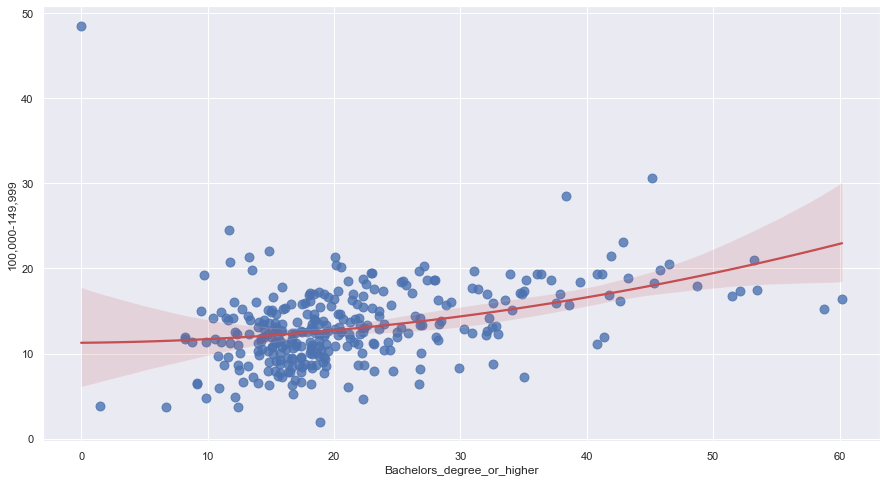

In [18]:
sns.regplot(data=df, 
            x='Bachelors_degree_or_higher', 
            y='100,000-149,999', 
            line_kws={'color': 'r'},
            scatter_kws={"s": 80},
            order=2, 
            ci=90)

<AxesSubplot:xlabel='Bachelors_degree_or_higher'>

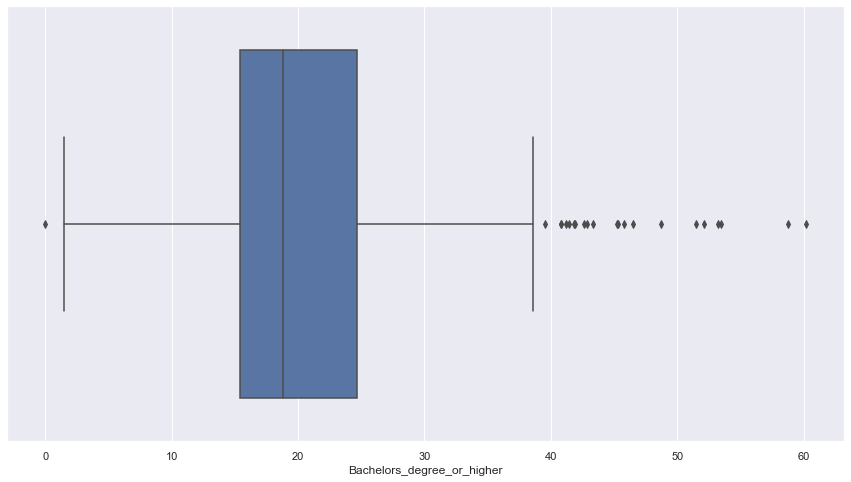

In [21]:
sns.boxplot(x='Bachelors_degree_or_higher',data=df)

<AxesSubplot:xlabel='STATE', ylabel='Bachelors_degree_or_higher'>

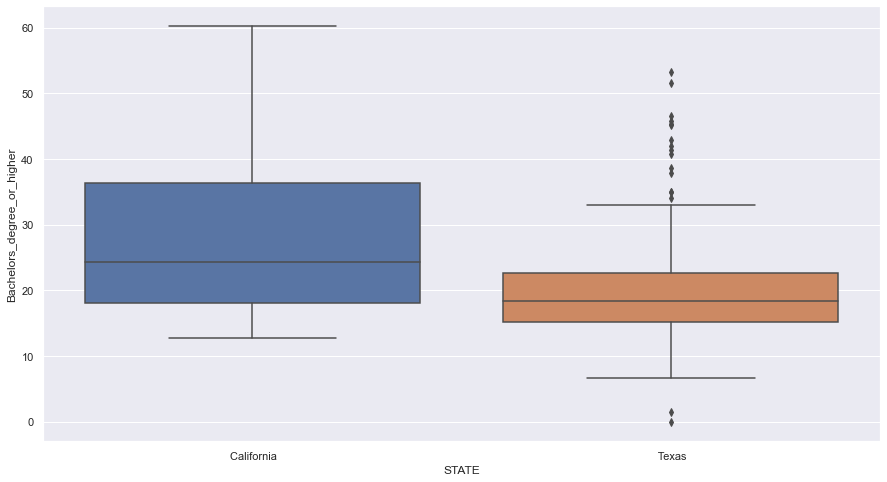

In [20]:
sns.boxplot(y="Bachelors_degree_or_higher",
            x="STATE", 
            data=df)